In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('ads.csv')

# EDA

In [3]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


Unnamed: 0 column needs to be removed as it is an identifier column

In [4]:
df.shape

(200, 5)

Dataset have 200 rows and 5 columns

In [5]:
df.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

All the features are of numerical type

In [6]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

There is no missing data

In [7]:
df.nunique()

Unnamed: 0    200
TV            190
radio         167
newspaper     172
sales         121
dtype: int64

All the data is of continuous tyoe

In [8]:
df.skew()

Unnamed: 0    0.000000
TV           -0.069853
radio         0.094175
newspaper     0.894720
sales         0.407571
dtype: float64

Newspaper feature is highly skewed

In [9]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


Total count of all columns is 200 i.e. no missing values, mean is less than the median for tv feature and in rest of the columns mean is greater. Variance is high in all features and highest in tv column. Outliers are present as min. max and interquartile range do not have the same difference

### Univariate Analysis

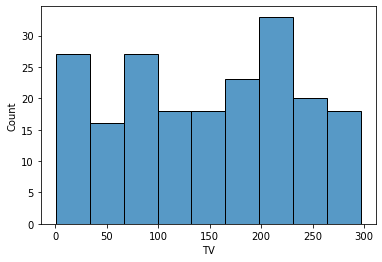

In [10]:
sns.histplot(df.TV)

Highest value of tv channel lies between 200 to 250,after that between 0 to 30 and 70 to 100. Rest all all are almost equal

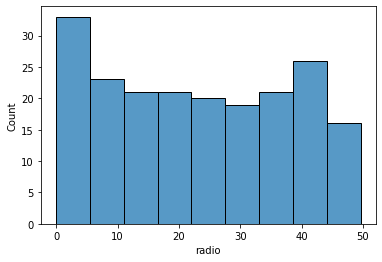

In [11]:
sns.histplot(df.radio)

Companies do not seem to spend much on radio channel as not more than 50 is spend on it and graph keep on decreasing as tha value increases.

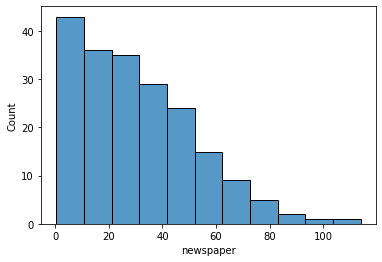

In [12]:
sns.histplot(df.newspaper)

Very few companies spend money on newspaper, Most of the company spend only 10 for the newspaper channel

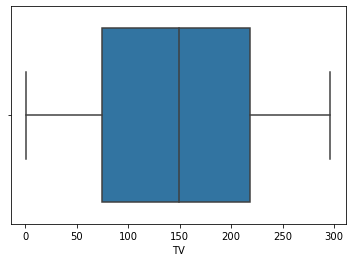

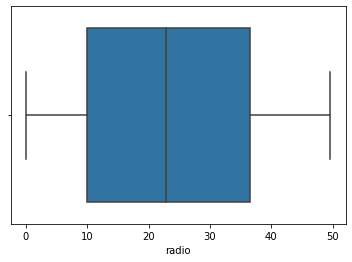

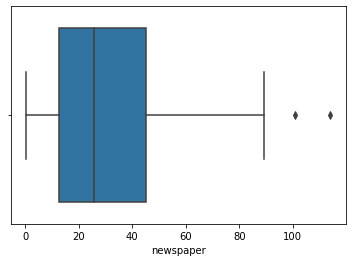

<Figure size 432x288 with 0 Axes>

In [13]:
for i in ['TV','radio','newspaper']:
    sns.boxplot(df[i])
    plt.figure()

There are no putliers present, except for newspaper and too very few

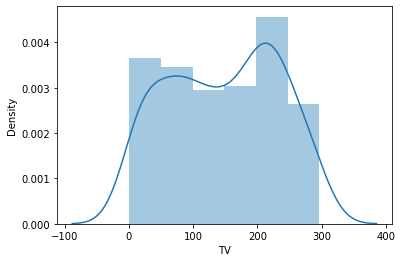

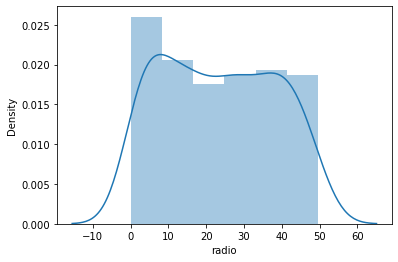

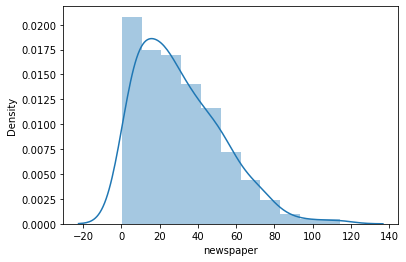

<Figure size 432x288 with 0 Axes>

In [14]:
for i in ['TV','radio','newspaper']:
    sns.distplot(df[i])
    plt.figure()

Newspaper column shows skewness towards right, whereas rest of the columns are almost normally distributed.

### Bivariate Analysis

In [15]:
for i in range(3):
    for j in range(i+1,3):
        sns.scatterplot(x=df[col[i]],y=df[col[j]])
        plt.figure()

NameError: name 'col' is not defined

There is no correlation between any of the dependent features, only a little positive correlation can be seen between newspaper and radio channel

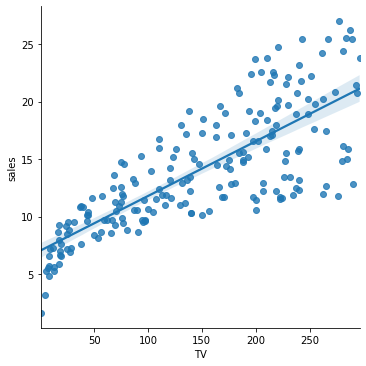

<Figure size 432x288 with 0 Axes>

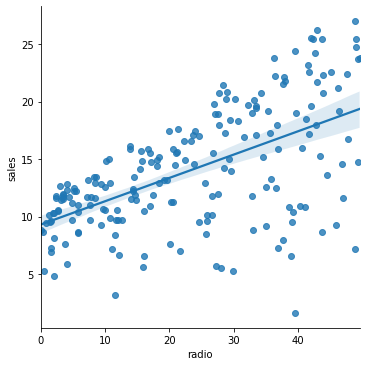

<Figure size 432x288 with 0 Axes>

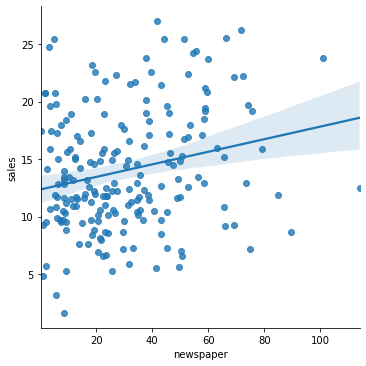

<Figure size 432x288 with 0 Axes>

In [16]:
col=['TV','radio','newspaper']
for i in col:
    sns.lmplot(x=i,y='sales',data=df)
    plt.figure()

Tv and radio shows strong positive correlation with sales price with few outliers whereas newspaper also shows positive correlation with more no. of outliers

### Multivariate Analysis

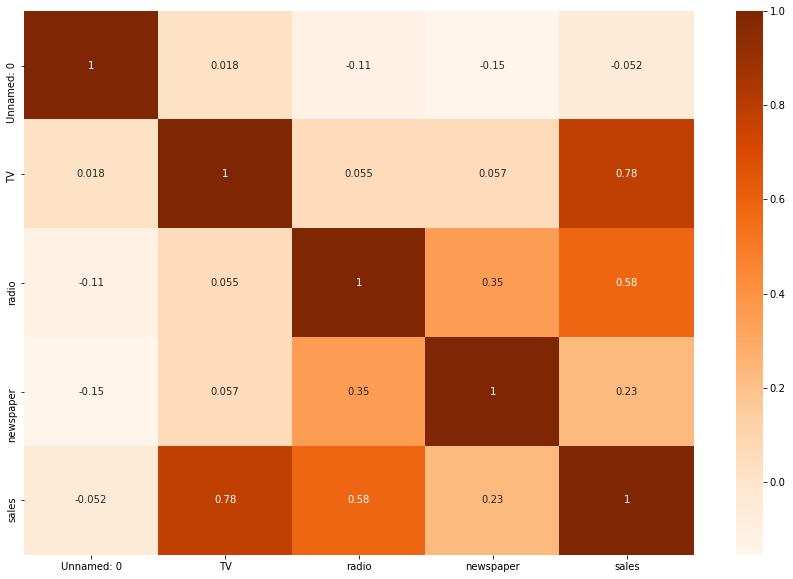

In [17]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='Oranges')

Sales price shows strongest positive correlation with tv, then with radio an  least with sales. Newspaper and radio also show show correlation between them

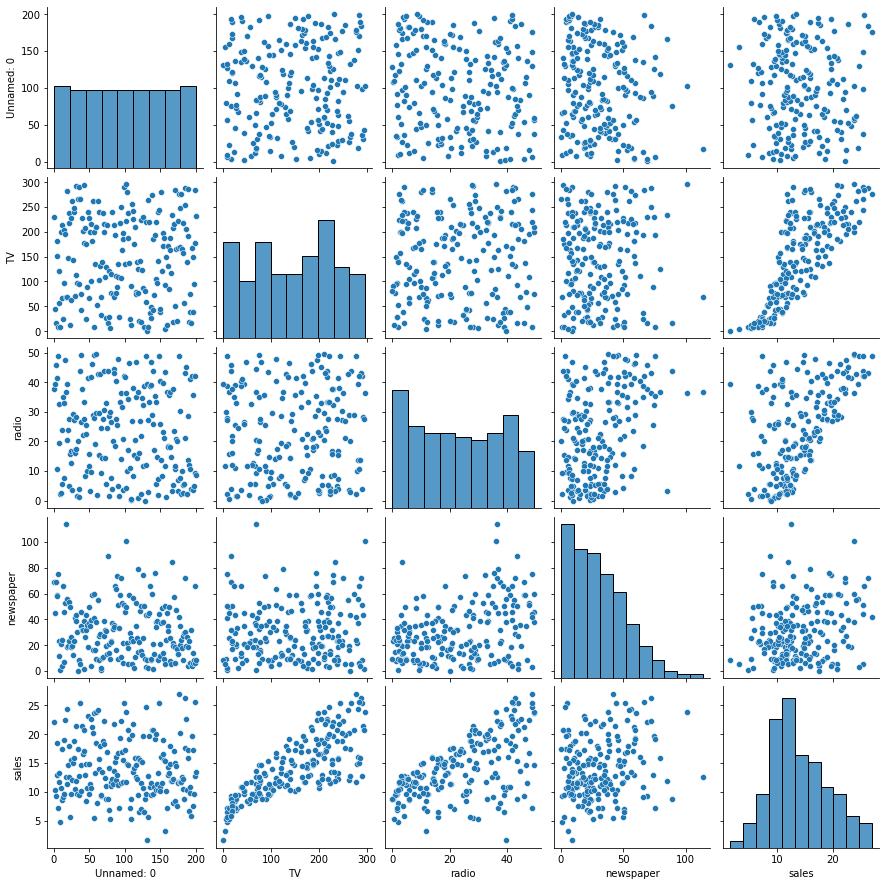

In [18]:
sns.pairplot(df)

There seems to be very less dependency between dependent variables except for newspaper and radio. Also from above distributions can be seen. Newspaper column is least properly distributed

# Feature Engineering

In [19]:
#dropping the identifier column
df.drop('Unnamed: 0',axis=1,inplace=True)

In [20]:
#Removing skewness of newspaper column
df['newspaper']=np.sqrt(df['newspaper'])

In [21]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.062388
sales        0.407571
dtype: float64

All the columns have very little or no skewness.

In [22]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,8.318654,22.1
1,44.5,39.3,6.715653,10.4
2,17.2,45.9,8.324662,9.3
3,151.5,41.3,7.648529,18.5
4,180.8,10.8,7.641989,12.9


In [23]:
#separating dependent and independent variables
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [24]:
x

,TV,radio,newspaper
0,230.1,37.8,8.318654
1,44.5,39.3,6.715653
2,17.2,45.9,8.324662
3,151.5,41.3,7.648529
4,180.8,10.8,7.641989
...,...,...,...
195,38.2,3.7,3.714835
196,94.2,4.9,2.846050
197,177.0,9.3,2.529822
198,283.6,42.0,8.136338


In [25]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [26]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()

In [27]:
xd=s.fit_transform(x)
x=pd.DataFrame(xd,columns=x.columns)

In [28]:
x.head()

,TV,radio,newspaper
0,0.969852,0.981522,1.563095
1,-1.197376,1.082808,0.774855
2,-1.516155,1.528463,1.566049
3,0.052050,1.217855,1.233576
4,0.394182,-0.841614,1.230360


In [29]:
#Importing Regressiom Models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [30]:
from sklearn.model_selection import train_test_split, cross_val_score

In [31]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [32]:
#Finding best random state using Linear Regression
def randomstate(x,y):
    maxx=0
    model=LinearRegression()
    for i in range(1,201):
        xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=i)
        model.fit(xtrain,ytrain)
        p=model.predict(xtest)
        accu=r2_score(p,ytest)
        if accu>maxx:
            maxx=accu
            j=i
    return j

In [33]:
#Displays various performances metrics
def performance(p,ytest,m):
    print('------------------------------------',m,'------------------------------------')
    print('Mean absolute error',np.round(mean_absolute_error(p,ytest),4))
    print('Mean squared error',np.round(mean_squared_error(p,ytest),4))
    print('Root Mean absolute error',np.round(np.sqrt(mean_squared_error(p,ytest)),4))
    print('R2 Score',np.round(r2_score(ytest,p),4)*100)

In [34]:
models=[KNeighborsRegressor(),LinearRegression(),Ridge(),Lasso(),ElasticNet(),SVR(),DecisionTreeRegressor(),
        RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),XGBRegressor()]

In [35]:
#Function to create different models
def createmodel(trainx,testx,trainy,testy):
    for i in models:
        model=i
        model.fit(trainx,trainy)
        p=model.predict(testx)
        score=cross_val_score(model,x,y,cv=10)
        performance(p,testy,model)

In [36]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=randomstate(x,y))
createmodel(xtrain,xtest,ytrain,ytest)

------------------------------------ KNeighborsRegressor() ------------------------------------
Mean absolute error 0.8788
Mean squared error 1.4013
Root Mean absolute error 1.1838
R2 Score 94.23
------------------------------------ LinearRegression() ------------------------------------
Mean absolute error 0.9847
Mean squared error 1.5155
Root Mean absolute error 1.231
R2 Score 93.76
------------------------------------ Ridge() ------------------------------------
Mean absolute error 0.9794
Mean squared error 1.4983
Root Mean absolute error 1.224
R2 Score 93.83
------------------------------------ Lasso() ------------------------------------
Mean absolute error 1.2824
Mean squared error 3.0032
Root Mean absolute error 1.733
R2 Score 87.64
------------------------------------ ElasticNet() ------------------------------------
Mean absolute error 1.7044
Mean squared error 4.9438
Root Mean absolute error 2.2235
R2 Score 79.65
------------------------------------ SVR() --------------------

Models giving best accuracy are Random Forest, Gradient Boost and Xtreme Gradient Boost, therefore we perform hyperparameter tuning on them

### Hyperparameter Tuning

In [37]:
from sklearn.model_selection import GridSearchCV
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=randomstate(x,y))

##### Random Forest

In [38]:
params={'n_estimators':[100, 200, 300, 400, 500],
            'criterion':['mse','mae'],
            'max_depth':[None,1,2,3,4,5,6,7,8,9,10],
           'max_features':['int','float','auto','log2']}

In [39]:
g=GridSearchCV(RandomForestRegressor(),params,cv=10)

In [40]:
g.fit(xtrain,ytrain)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['int', 'float', 'auto', 'log2'],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [28]:
print(g.best_params_)
print(g.best_score_)

{'criterion': 'mae', 'max_depth': None, 'max_features': 'auto', 'n_estimators': 300}
0.9769492073703034


In [42]:
m=RandomForestRegressor(criterion= 'mae', max_depth= None, max_features= 'auto', n_estimators=300)
m.fit(xtrain,ytrain)
p=m.predict(xtest)
score=cross_val_score(m,x,y,cv=10)
performance(p,ytest,m)
print('Mean of cross validation score',np.round(score.mean(),4))

------------------------------------ RandomForestRegressor(criterion='mae', n_estimators=300) ------------------------------------
Mean absolute error 0.7185
Mean squared error 0.8104
Root Mean absolute error 0.9002
R2 Score 96.67
Mean of cross validation score 0.9804


##### Xtreme Gradient Boosting

In [46]:
params={
 "learning_rate"    : [0.001,0.05, 0.10, 0.15,] ,
 "max_depth"        : [ 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [47]:
g=GridSearchCV(XGBRegressor(),params,cv=10)

In [48]:
g.fit(xtrain,ytrain)

GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_par

In [49]:
print(g.best_params_)
print(g.best_score_)

{'colsample_bytree': 0.7, 'gamma': 0.0, 'learning_rate': 0.15, 'max_depth': 4, 'min_child_weight': 7}
0.9683627714274629


In [50]:
m=XGBRegressor(colsample_bytree= 0.7, gamma=0.0, learning_rate=0.15, max_depth=4, min_child_weight=7,verbosity=0)
m.fit(xtrain,ytrain)
p=m.predict(xtest)
score=cross_val_score(m,x,y,cv=10)
performance(p,ytest,m)
print('Mean of cross validation score',np.round(score.mean(),4))

------------------------------------ XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.15, max_delta_step=0, max_depth=4,
             min_child_weight=7, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=0) ------------------------------------
Mean absolute error 0.7073
Mean squared error 0.8535
Root Mean absolute error 0.9239
R2 Score 96.49
Mean of cross validation score 0.9722


##### Gradient Boosting

In [51]:
params={'n_estimators':[100,200,300,400,500],
      'learning_rate':[0.05, 0.10, 0.20],
      'subsample':[0.5,1],
      'criterion':['friedman_mse', 'mse', 'mae'],
      'max_depth':[1,2,3,4,5,6,7,8,9]}

In [52]:
g=GridSearchCV(GradientBoostingRegressor(),params,cv=10)

In [53]:
g.fit(xtrain,ytrain)

GridSearchCV(cv=10, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'mse', 'mae'],
                         'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'n_estimators': [100, 200, 300, 400, 500],
                         'subsample': [0.5, 1]})

In [54]:
print(g.best_params_)
print(g.best_score_)

{'criterion': 'friedman_mse', 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 500, 'subsample': 0.5}
0.9859722346736126


In [55]:
m=GradientBoostingRegressor(criterion='friedman_mse',learning_rate= 0.05, max_depth= 5, n_estimators= 500, subsample= 0.5)
m.fit(xtrain,ytrain)
p=m.predict(xtest)
score=cross_val_score(m,x,y,cv=10)
performance(p,ytest,m)
print('Mean of cross validation score',np.round(score.mean(),4))

------------------------------------ GradientBoostingRegressor(learning_rate=0.05, max_depth=5, n_estimators=500,
                          subsample=0.5) ------------------------------------
Mean absolute error 0.5318
Mean squared error 0.4922
Root Mean absolute error 0.7016
R2 Score 97.97
Mean of cross validation score 0.9873


Hence best model for this dataset is Gradient Boost Regressor

### Finalizing the model

In [56]:
model=GradientBoostingRegressor(criterion='friedman_mse',learning_rate= 0.05, max_depth= 5, n_estimators= 500, subsample= 0.5)
model.fit(xtrain,ytrain)
p=model.predict(xtest)
score=cross_val_score(model,x,y,cv=10)

### Evaluation Metrics

In [59]:
performance(p,ytest,model)
print(score.mean())

------------------------------------ GradientBoostingRegressor(learning_rate=0.05, max_depth=5, n_estimators=500,
                          subsample=0.5) ------------------------------------
Mean absolute error 0.4717
Mean squared error 0.3512
Root Mean absolute error 0.5926
R2 Score 98.55000000000001
0.9878631980423508


Text(0.5, 1.0, 'Gradient Boost Regressor')

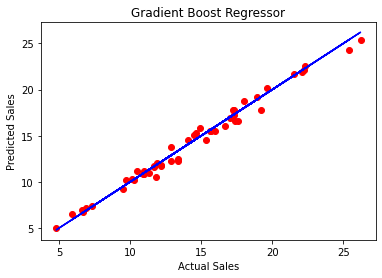

In [61]:
plt.scatter(x=ytest,y=p,color='r')
plt.plot(ytest,ytest,color='b')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Gradient Boost Regressor')

### Saving the model

In [62]:
import joblib
joblib.dump(model,'Ads_Sales.obj')

['Ads_Sales.obj']